In [4]:
## Fashion MNIST - available in tensorflow as an API
## 70K images 10 categories of size 28X28 
## Can train a neural net
## Images are in gray scale
## output labels are numbers

In [2]:
import tensorflow as tf
tf.__version__

'1.14.0'

#### Import MNIST fashion data set 

In [3]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
training_images.shape

(60000, 28, 28)

In [15]:
set(training_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

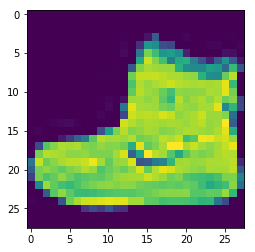

In [16]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [17]:
## Normalizing the images - python can handle element wise matrix operation easily
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [18]:
## Model
## Flatten makes 2 dimensional input to 1 dimensional
## first hidden layer is of 128 neurons and second one is of 10 with softmax as to match the output
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
## Model compile with ADAM optimizer and loss as sparse categorical cross entropy 
## metrics is accuracy. So accuracy is calculated while training and while evaluation
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2312 - acc: 0.9141
Epoch 2/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2229 - acc: 0.9152
Epoch 3/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2169 - acc: 0.9197
Epoch 4/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2099 - acc: 0.9204
Epoch 5/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2047 - acc: 0.9237


In [25]:
## Evaluate the model for accuracy
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 21us/sample - loss: 0.3705 - acc: 0.8801


[0.37052472931146624, 0.8801]

In [27]:
## Classifications
classifications = model.predict(test_images)
classifications[0]

array([1.8535086e-08, 3.1749748e-12, 4.5164068e-12, 3.4927523e-12, 5.6818349e-11, 5.2512346e-06, 1.8576070e-08, 1.4451195e-03, 1.4024487e-09, 9.9854952e-01], dtype=float32)

In [28]:
test_labels[0]

9

In [35]:
### What happens if we change the last layer to 5 outputs instead of 10
## Model fails while trying to train the model with invalid argument
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5


InvalidArgumentError: Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 0 7 8 5 3 5 3 3 4 1 4 1 9 5 9 3 5 9 5 1 0 5 4 8 4 3 9 3 2 2 9 5
	 [[{{node loss_7/output_1_loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]

In [37]:
### What happens if number of layers are increased
## In this scenerio, there isn't significant impact as the data is simple
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4686 - acc: 0.8302
Epoch 2/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3562 - acc: 0.8680
Epoch 3/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3154 - acc: 0.8831
Epoch 4/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2941 - acc: 0.8901
Epoch 5/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2768 - acc: 0.8948


In [40]:
## What if number of epochs are increased to 30
## Loss dexcreases. But after more epochs loss starts to fluctuate - this is side effect of over fitting.There's no point in wasting your time training if you aren't improving your loss.
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4964 - acc: 0.8260
Epoch 2/50
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3725 - acc: 0.8650
Epoch 3/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3337 - acc: 0.8781
Epoch 4/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3108 - acc: 0.8863
Epoch 5/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2930 - acc: 0.8917
Epoch 6/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2789 - acc: 0.8964
Epoch 7/50
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2666 - acc: 0.9003
Epoch 8/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2557 - acc: 0.9041
Epoch 9/50
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2465 - acc: 0.9086
Epoch 10/50
60000/60000 [==============================] - 2s 38us/sample - loss: 

In [41]:
## Early Stop
### with callbacks in fit statement, the call back method is executed at the end of each epoch. Here model training stops when loss < 40%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4749
Epoch 2/5
59584/60000 [============================>.] - ETA: 0s - loss: 0.3575
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3574
